In [60]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
HI_Pipe3D_WISE = fits.open("WISE_Pipe3D_HI_new.fits", memmap=True)
HI_Pipe3D_WISE_table = Table(HI_Pipe3D_WISE[1].data)

In [62]:
MHI_log_initial = numpy.array(HI_Pipe3D_WISE_table['LOGMHI'])  # Stores all data of MHI log(Msun)
SM_log_initial = numpy.array(HI_Pipe3D_WISE_table['log_Mass'])    #SM = Stellar Mass    log(Msun)
W2_initial = numpy.array(HI_Pipe3D_WISE_table['W2'])  # Stores all data of W2
W3_initial = numpy.array(HI_Pipe3D_WISE_table['W3'])  # Stores all data of W3
Flagall = numpy.array(HI_Pipe3D_WISE_table['conflag'])   # All Flag data 
Plateifu_initial = numpy.array(HI_Pipe3D_WISE_table['plateifu_1'])

good = numpy.where((MHI_log_initial > 0) & (Flagall==0))



# Data for positive MHI and confused data
MHI_log = MHI_log_initial[good]                  # HI Mass log(Msun)
SM_log = SM_log_initial[good]                    # Steller Mass log(Msun)
W2 = W2_initial[good]
W3 = W3_initial[good]
Plateifu = Plateifu_initial[good]

print(len(W2_initial))
print(len(W2))

MF_log = MHI_log - SM_log                     # Mass Fraction     log(Msun) 
W2diffW3 = W2 - W3

diff2line = numpy.full(len(W2), 2)

3656
1206


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


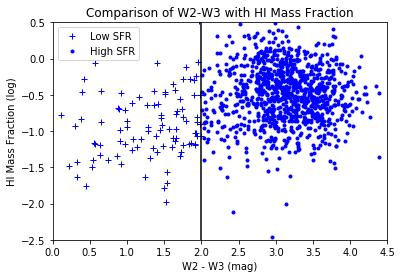

In [65]:
plt.xlabel("W2 - W3 (mag)")
plt.ylabel("HI Mass Fraction (log)")
plt.title("Comparison of W2-W3 with HI Mass Fraction")

plt.plot(W2diffW3[numpy.where(W2diffW3 < 2)], MF_log[numpy.where(W2diffW3 < 2)], 'b+', alpha=1.0, label='Low SFR') 
plt.plot(W2diffW3[numpy.where(W2diffW3 > 2)], MF_log[numpy.where(W2diffW3 > 2)], 'b.', label='High SFR') 
plt.plot([2.0, 2.0], [-2.5, 0.5], "k-")


plt.xlim(0, 4.5)
plt.ylim(-2.5, 0.5)
plt.legend()
plt.show()

In [18]:
# print(len(Plateifu[numpy.where((W2diffW3 < 2) & (MF_log > -1.2))].tolist()))
# print(len(Plateifu[numpy.where((W2diffW3 < 2))].tolist()))
print(Plateifu[numpy.where((W2diffW3 < 2) & (MF_log > -1.2))].tolist())

['7957-12701                      ', '7958-3704                       ', '7992-9101                       ', '8148-6102                       ', '8439-1902                       ', '8446-3702                       ', '8935-3704                       ', '9183-3702                       ', '9892-3702                       ', '8243-3701                       ', '8453-3703                       ', '8483-1902                       ', '8948-6102                       ', '8554-12704                      ', '8248-3701                       ', '8551-9101                       ', '8588-3704                       ', '8717-6101                       ', '8942-6102                       ', '10220-9101                      ', '10516-3701                      ', '7957-6102                       ', '7960-3702                       ', '7979-3701                       ', '7991-6101                       ', '7993-12704                      ', '8134-6102                       ', '8135-6103                 

/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
print(Plateifu[numpy.where(W2diffW3 < 2)].tolist())

['7957-12701                      ', '7958-3704                       ', '7992-9101                       ', '8148-6102                       ', '8439-1902                       ', '8446-3702                       ', '8935-3704                       ', '9183-3702                       ', '9892-3702                       ', '8243-3701                       ', '8453-3703                       ', '8483-1902                       ', '8948-6102                       ', '8554-12704                      ', '8248-3701                       ', '8551-9101                       ', '8588-3704                       ', '8717-6101                       ', '8942-6102                       ', '9492-6104                       ', '10001-3704                      ', '10220-9101                      ', '10499-3701                      ', '10499-6102                      ', '10516-3701                      ', '7957-6102                       ', '7960-3702                       ', '7979-3701                 

/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
